# Time Series Data Exploration

In [232]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime
plt.ion()

import warnings
warnings.filterwarnings("ignore")

from acquire import full_dataframe, get_germany_wind_solar_data
from prepare import prepare_store_data, prepare_german_energy_data

Plotting defaults:

In [17]:
plt.rc('figure', figsize=(13, 6))
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=13)

## Import Store Item Data

In [18]:
df = full_dataframe()

In [19]:
df = prepare_store_data(df)

In [20]:
df.head()

,item,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,level_0,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,11,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,5,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,11,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,11,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,294.00


## Train, Test Split

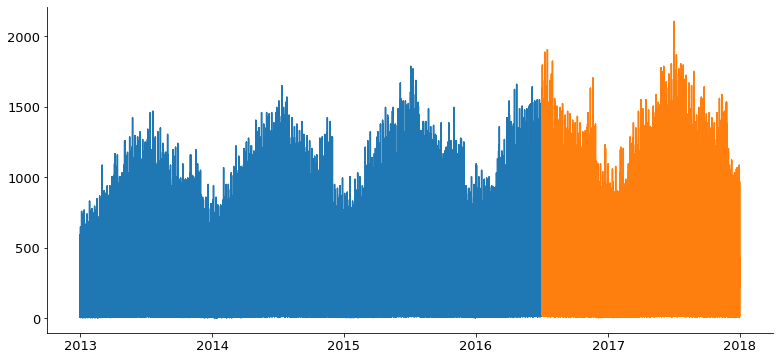

In [22]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

train_data = plt.plot(train.index, train.sales_total)
test_data = plt.plot(test.index, test.sales_total)

The key variable here is total sales, so we will work with that variable in exploring our data.

In [103]:
s = train.sales_total.copy()

## Visualizing the Time Series Data

In [28]:
s.head()

sale_date
2013-01-01 00:00:00+00:00     10.92
2013-01-01 00:00:00+00:00    218.40
2013-01-01 00:00:00+00:00    125.55
2013-01-01 00:00:00+00:00    453.60
2013-01-01 00:00:00+00:00    294.00
Name: sales_total, dtype: float64

<AxesSubplot:xlabel='sale_date'>

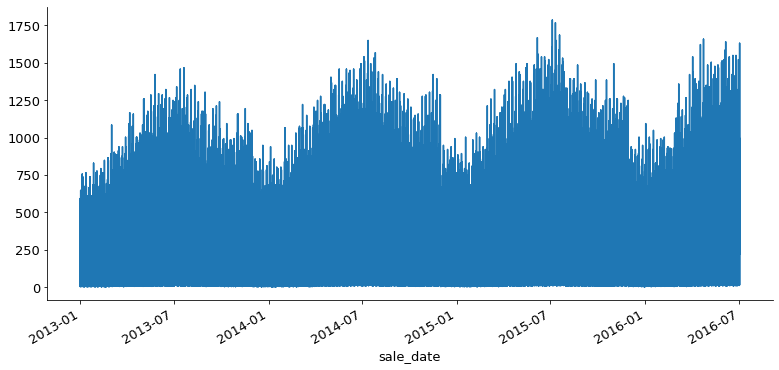

In [29]:
s.plot()

We can resample at longer frequencies for smooth lines.

<AxesSubplot:xlabel='sale_date'>

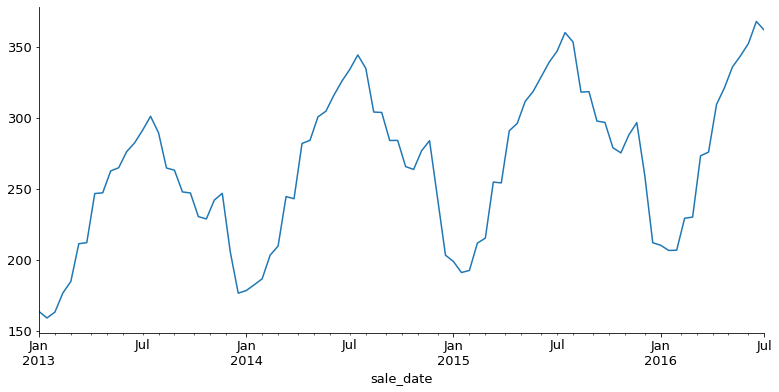

In [30]:
s.resample('2W').mean().plot()

<AxesSubplot:xlabel='sale_date'>

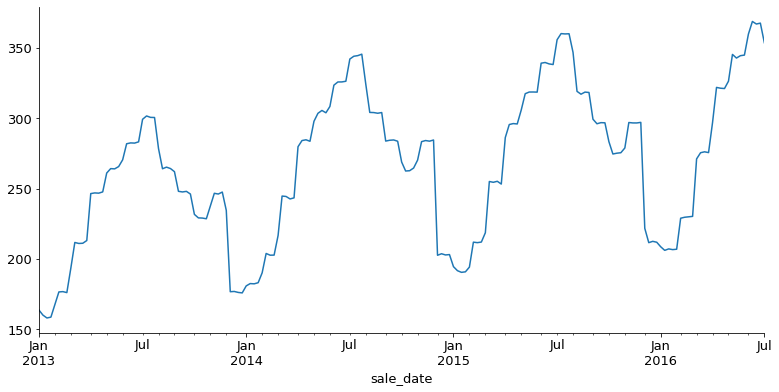

In [32]:
s.resample('W').mean().plot()

<AxesSubplot:xlabel='sale_date'>

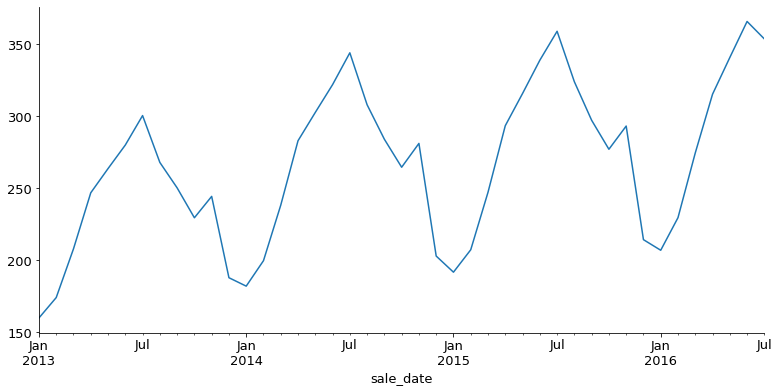

In [98]:
s.resample('1M').mean().plot()

**Conclusion**

Overall sales are increasing. Sales rise in summer, peaking in July, and fall in Winter, with a low in January.

We can also graph multiple resampling periods on a single visualization.

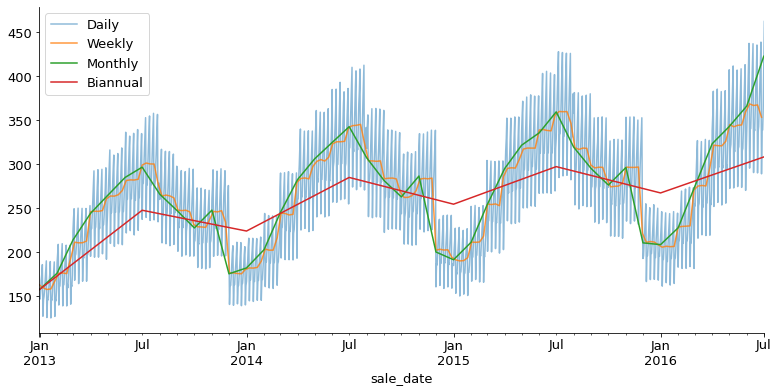

In [38]:
ax = s.resample('D').mean().plot(alpha=.5, label='Daily')
s.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
s.resample('M').mean().plot(ax=ax, label='Monthly')
s.resample('6M').mean().plot(ax=ax, label='Biannual')
ax.legend()

## Barplot by Day of the Week

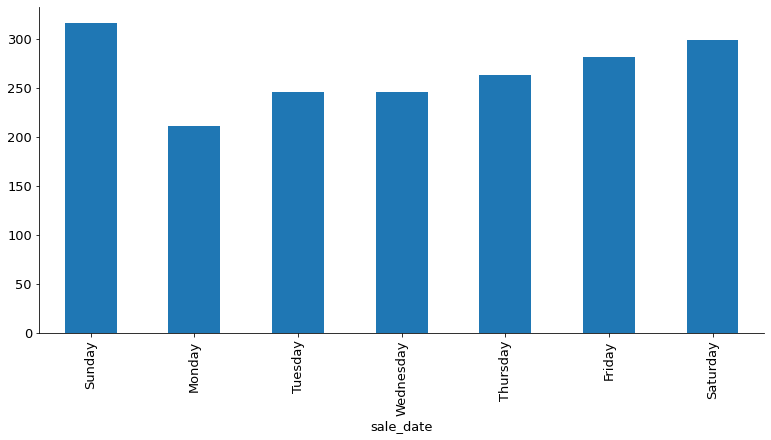

In [109]:
ax = s.groupby(s.index.strftime('%w-%A')).mean().plot.bar()
labels = ax.get_xticklabels()
set_labels = ax.set_xticklabels([l.get_text()[2:] for l in labels])

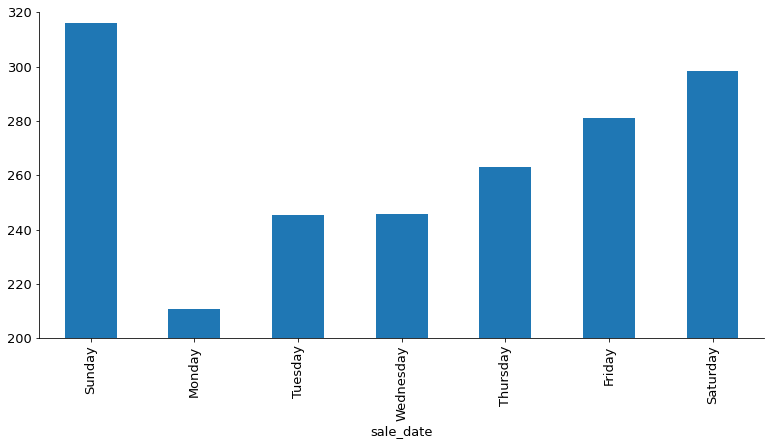

In [120]:
ax = s.groupby(s.index.strftime('%w-%A')).mean().plot.bar()
plt.ylim(200, 320)
labels = ax.get_xticklabels()
set_labels = ax.set_xticklabels([l.get_text()[2:] for l in labels])

Customers spend the most money on Sundays, and the least money on Mondays.

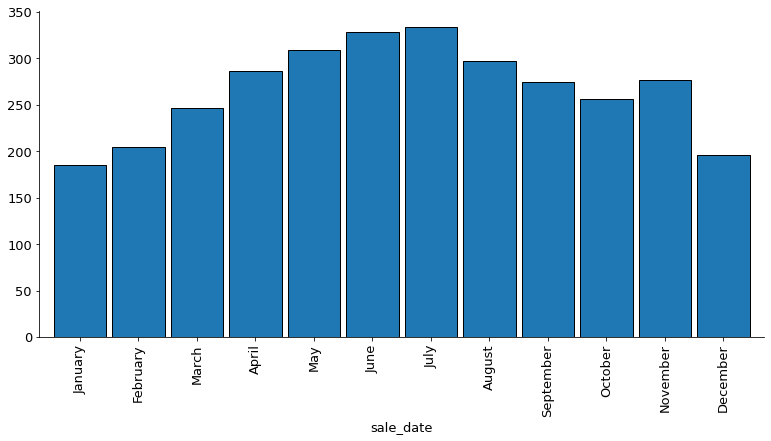

In [128]:
ax = s.groupby(s.index.strftime('%m-%B')).mean().plot.bar(width=.9, ec='black')
labels = ax.get_xticklabels()
set_labels = ax.set_xticklabels([l.get_text()[3:] for l in labels])

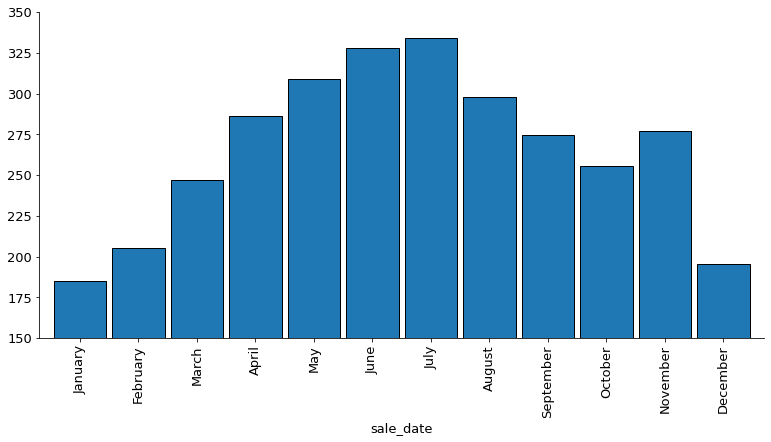

In [129]:
ax = s.groupby(s.index.strftime('%m-%B')).mean().plot.bar(width=.9, ec='black')
plt.ylim(150, 350)
labels = ax.get_xticklabels()
set_labels = ax.set_xticklabels([l.get_text()[3:] for l in labels])

Spending is the highest in the summer and the lowest in the winter. Sprending peaks in July and dips in January. 

Rolling Average

In [44]:
daily = s.resample('D').mean()
daily.rolling(30).mean().head(31)

sale_date
2013-01-01 00:00:00+00:00           NaN
2013-01-02 00:00:00+00:00           NaN
2013-01-03 00:00:00+00:00           NaN
2013-01-04 00:00:00+00:00           NaN
2013-01-05 00:00:00+00:00           NaN
2013-01-06 00:00:00+00:00           NaN
2013-01-07 00:00:00+00:00           NaN
2013-01-08 00:00:00+00:00           NaN
2013-01-09 00:00:00+00:00           NaN
2013-01-10 00:00:00+00:00           NaN
2013-01-11 00:00:00+00:00           NaN
2013-01-12 00:00:00+00:00           NaN
2013-01-13 00:00:00+00:00           NaN
2013-01-14 00:00:00+00:00           NaN
2013-01-15 00:00:00+00:00           NaN
2013-01-16 00:00:00+00:00           NaN
2013-01-17 00:00:00+00:00           NaN
2013-01-18 00:00:00+00:00           NaN
2013-01-19 00:00:00+00:00           NaN
2013-01-20 00:00:00+00:00           NaN
2013-01-21 00:00:00+00:00           NaN
2013-01-22 00:00:00+00:00           NaN
2013-01-23 00:00:00+00:00           NaN
2013-01-24 00:00:00+00:00           NaN
2013-01-25 00:00:00+00:00     

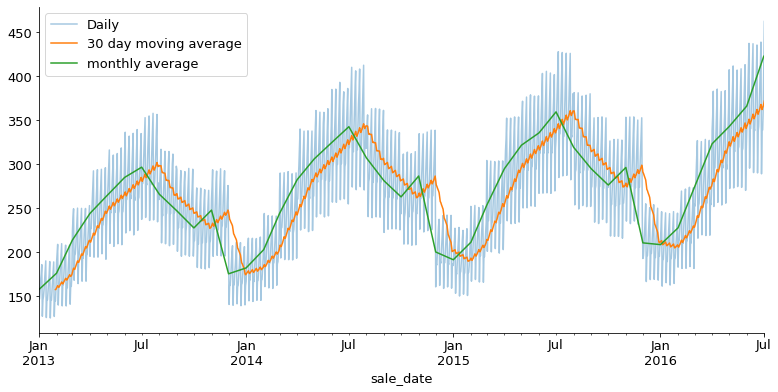

In [45]:
ax = s.resample('D').mean().plot(label='Daily', alpha=.4)
s.resample('D').mean().rolling(30).mean().plot(ax=ax, label='30 day moving average')
s.resample('M').mean().plot(ax=ax, label='monthly average')
ax.legend()

## Monthly Differences Graph

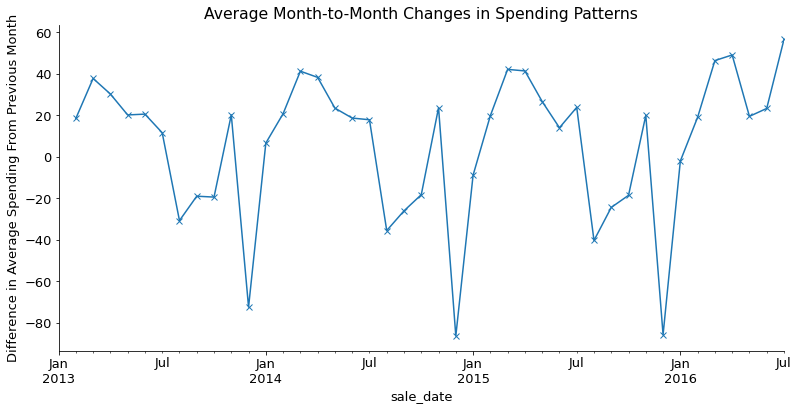

In [131]:
ax = s.resample('M').mean().diff().plot(marker='x')
title = ax.set(title = "Average Month-to-Month Changes in Spending Patterns", ylabel = "Difference in Average Spending From Previous Month")

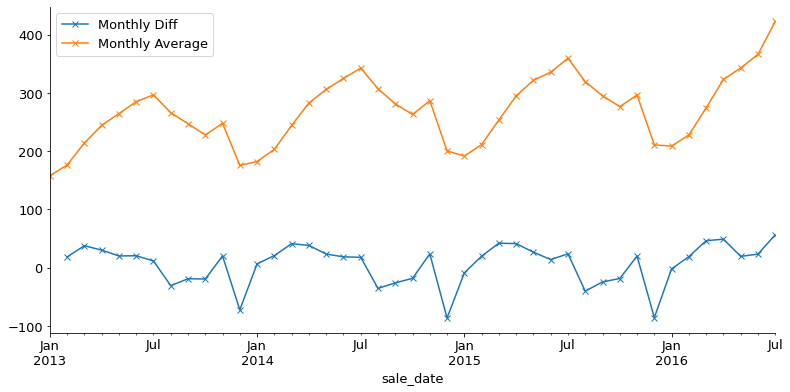

In [46]:
ax = s.resample('M').mean().diff().plot(label='Monthly Diff', marker='x')
s.resample('M').mean().plot(ax=ax, label='Monthly Average', marker='x')
plt.legend()

## Shift

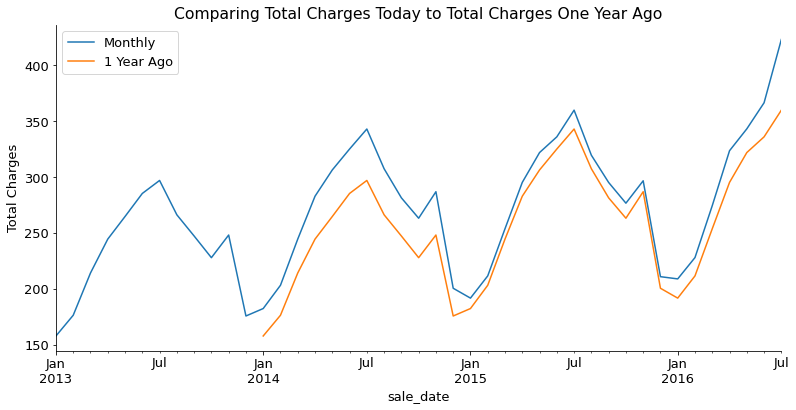

In [136]:
ax = s.resample('M').mean().plot(label='Monthly')
labels = ax.set(title = "Comparing Total Charges Today to Total Charges One Year Ago",
      ylabel = "Total Charges")
s.resample('M').mean().shift(12).plot(label='1 Year Ago', ax=ax)
legend = ax.legend()

Sales tend to be increasing.

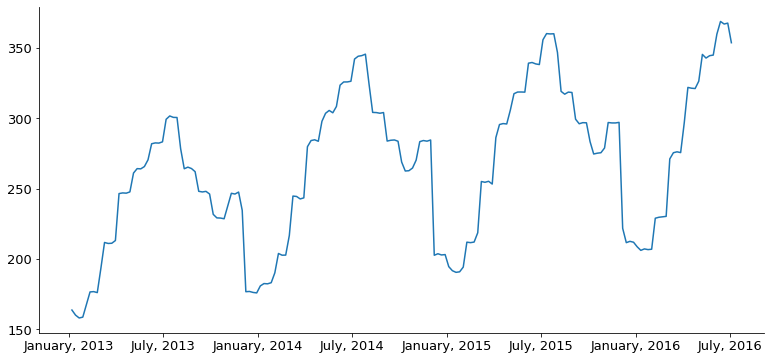

In [52]:
# Using a major formatter:
ax = plt.gca()
ax.plot(s.resample('W').mean())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%B, %Y'))

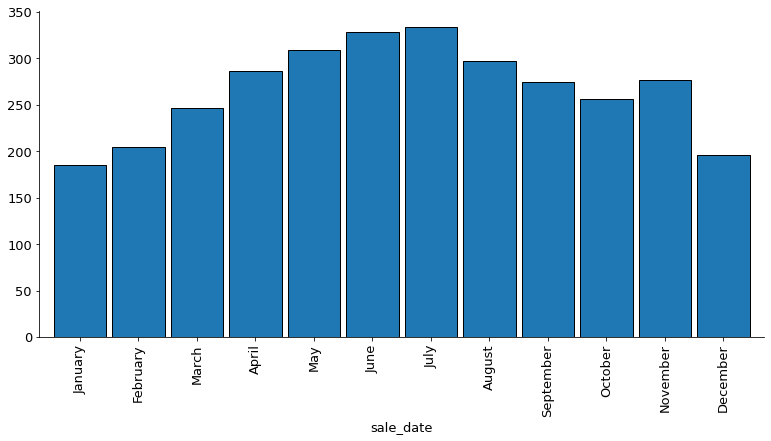

In [54]:
# Here we include the month number when grouping by month so that the months appear in the correct order in our visualization.
ax = s.groupby(s.index.strftime('%m-%B')).mean().plot.bar(width=.9, ec='black')
# The next two lines basically "slice off" the number prefix of the month labels.
labels = ax.get_xticklabels()
set_labels = ax.set_xticklabels([l.get_text()[3:] for l in labels])

## Seasonality and Trends

### Lag Plot

<AxesSubplot:xlabel='t', ylabel='t + 1'>

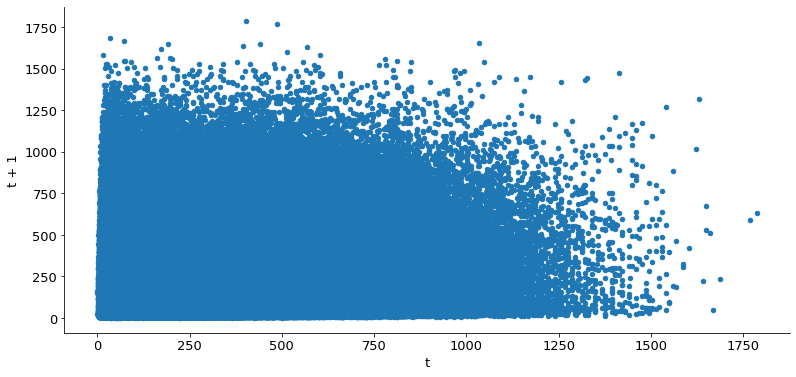

In [55]:
# We concatenate the series with itself shifted by 1 and then make a scatter plot of the two columns
pd.concat([s.rename('t'), s.shift().rename('t + 1')], axis=1).plot.scatter(y='t + 1', x='t')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

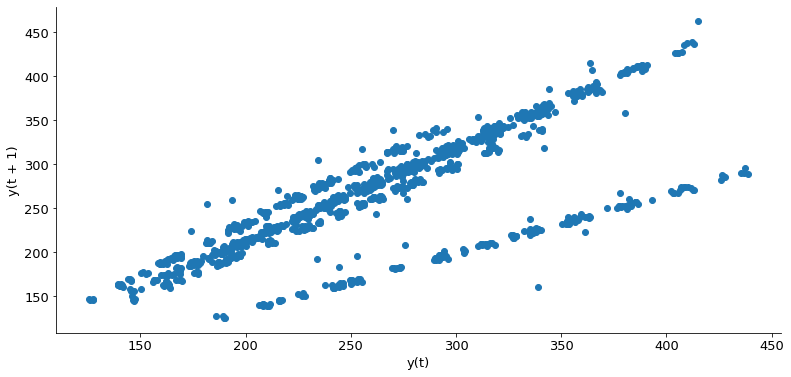

In [56]:
# note here we are using a pandas built-in to make our lag plot
pd.plotting.lag_plot(s.resample('D').mean(), 1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 52)'>

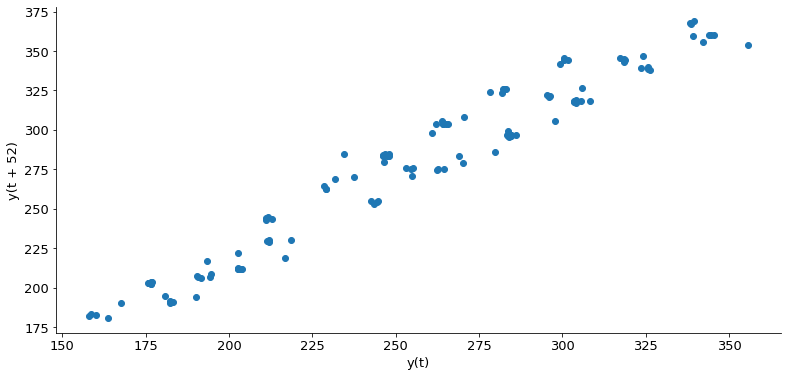

In [57]:
# We could also look at weeks instead of days
pd.plotting.lag_plot(s.resample('W').mean(), 52)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 365)'>

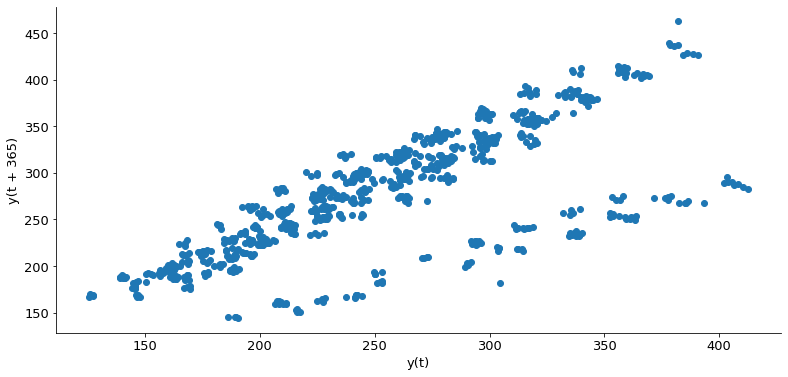

In [58]:
pd.plotting.lag_plot(s.resample('D').mean(), 365)


### Autocorrelation

In [60]:
def autocorrelation(s, lag):
    return pd.concat([s, s.shift(lag)], axis=1).dropna().corr().iloc[0, 1]

In [61]:
# Here we construct a series with index being each number from 1 to 365, and the values being the
# autocorrelation for that value of lag
autocorr = pd.Series({lag: autocorrelation(s.resample('D').mean(), lag) for lag in range(1, 365)})
autocorr


1      0.745681
2      0.660279
3      0.575999
4      0.570979
5      0.645040
         ...   
360    0.531377
361    0.534641
362    0.621253
363    0.709075
364    0.976395
Length: 364, dtype: float64

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 182)'>

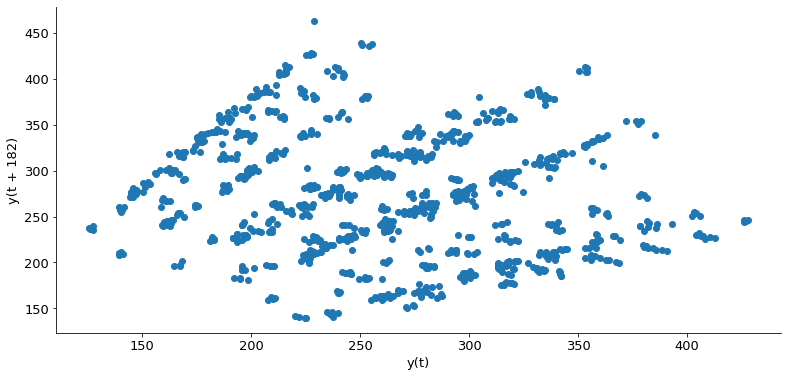

In [63]:
pd.plotting.lag_plot(s.resample('D').mean(), round(365 / 2))


<AxesSubplot:xlabel='lag period', ylabel='autocorrelation'>

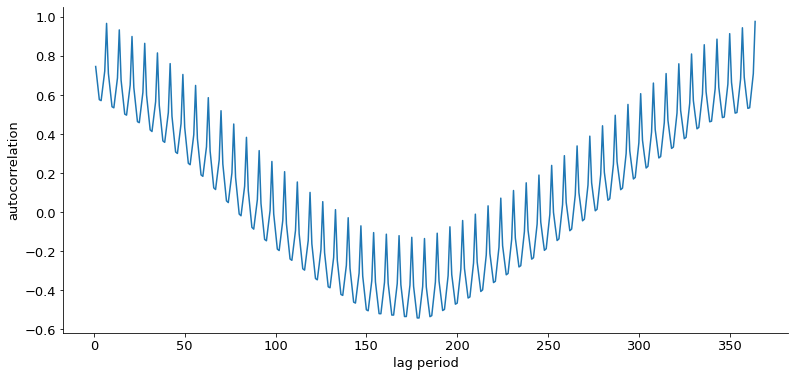

In [62]:
autocorr.plot(xlabel='lag period', ylabel='autocorrelation')


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

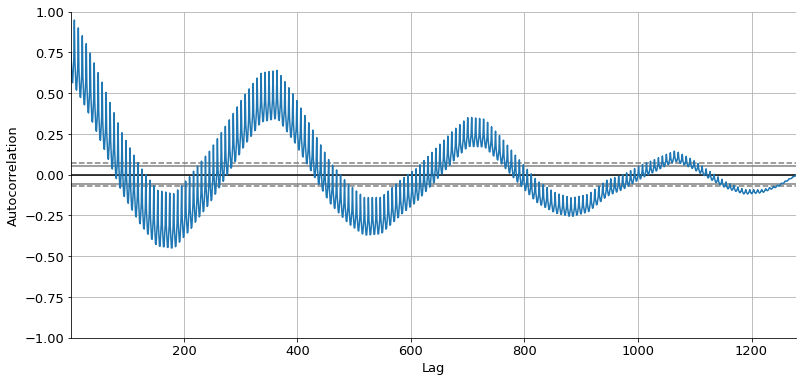

In [64]:
pd.plotting.autocorrelation_plot(s.resample('D').mean())


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

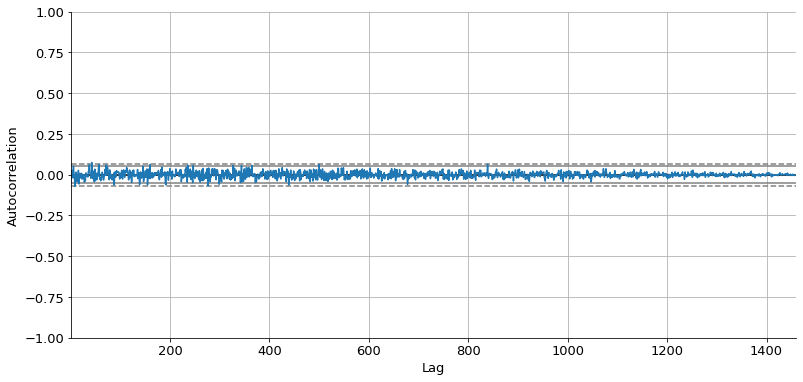

In [66]:
x = pd.Series(np.random.randn(365 * 4))
pd.plotting.autocorrelation_plot(x)

### Autocorrelation by Week

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

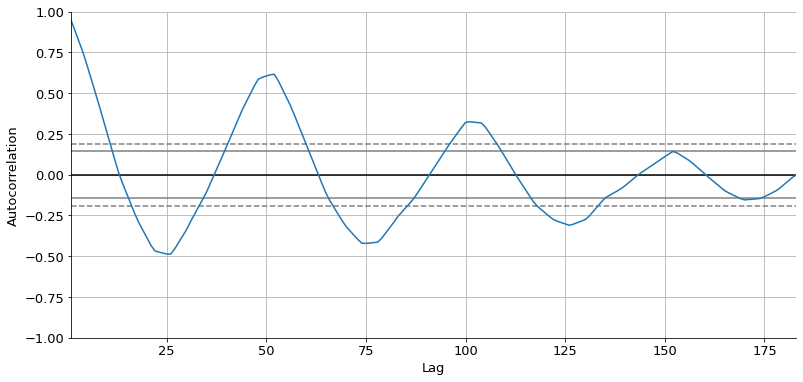

In [67]:
pd.plotting.autocorrelation_plot(s.resample('W').mean())

### Autocorrelation July 2013

<AxesSubplot:xlabel='sale_date'>

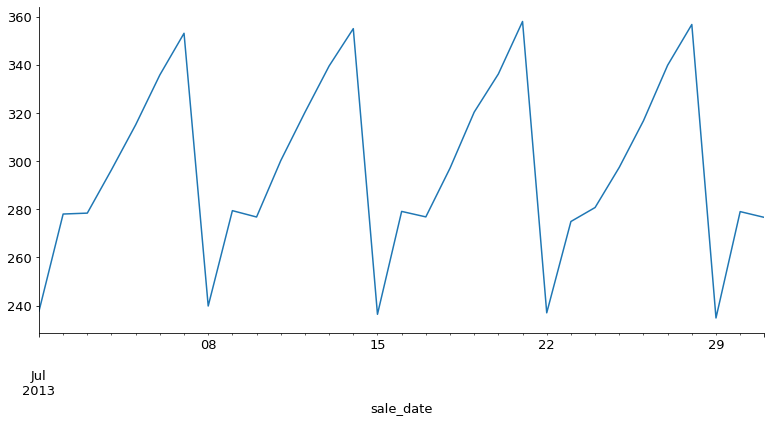

In [71]:
july = s['2013-07-01':'2013-07-31'].resample('D').mean()
july.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

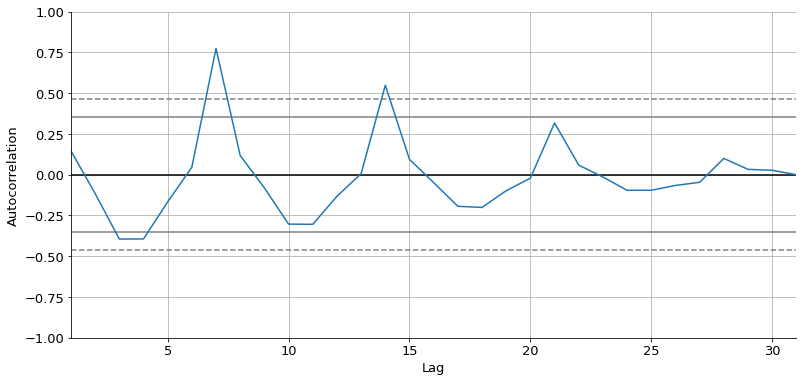

In [72]:
pd.plotting.autocorrelation_plot(hourly)


## Trend

### Seasonal 

#### Year

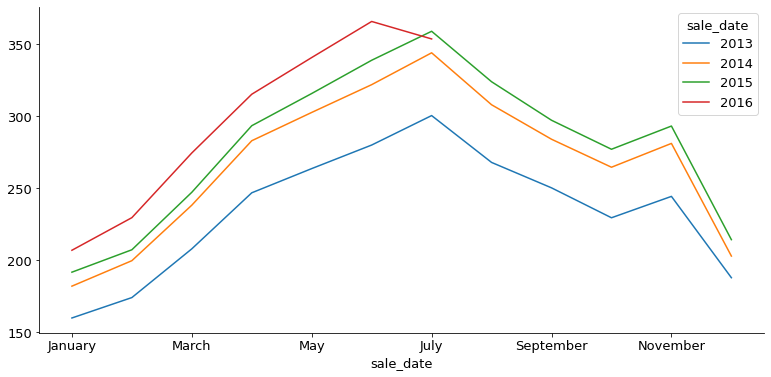

In [97]:
ax = s.groupby([s.index.year, s.index.strftime('%m-%B')]).mean().unstack(0).plot()
labels = ax.get_xticklabels()
labels = ax.set_xticklabels([l.get_text()[3:] for l in labels])

### Seasonal Subseries Plot

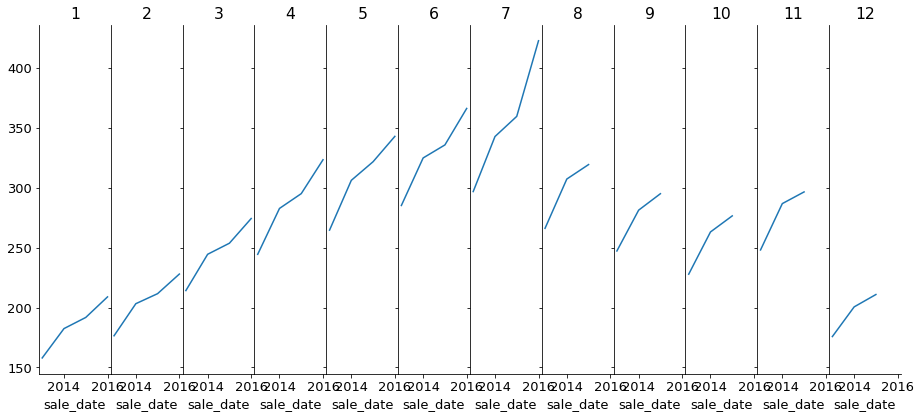

In [75]:
fig, axs = plt.subplots(1, 12, sharex=True, sharey=True)
for ax, (month, x) in zip(axs, s.groupby([s.index.year, s.index.month]).mean().unstack().iteritems()):
    x.plot(ax=ax, title=month)
fig.tight_layout()
fig.subplots_adjust(wspace=0)

## Seasonal Decomposition

In [78]:
import statsmodels.api as sm

In [76]:
s = s.resample('W').mean()

In [79]:
# using statsmodels
result = sm.tsa.seasonal_decompose(s, model='additive')
result = pd.DataFrame(dict(
    observed=result.observed,
    residual=result.resid,
    seasonal=result.seasonal,
    trend=result.trend
))

In [81]:
result.head(30)

,observed,residual,seasonal,trend
sale_date,,,,
2013-01-06 00:00:00+00:00,163.589167,NaN,-77.817427,NaN
2013-01-13 00:00:00+00:00,159.981203,NaN,-76.420498,NaN
2013-01-20 00:00:00+00:00,157.946720,NaN,-77.661680,NaN
2013-01-27 00:00:00+00:00,158.545383,NaN,-77.653889,NaN
2013-02-03 00:00:00+00:00,167.585014,NaN,-73.077372,NaN
2013-02-10 00:00:00+00:00,176.455603,NaN,-57.928741,NaN
2013-02-17 00:00:00+00:00,176.684657,NaN,-59.224037,NaN
2013-02-24 00:00:00+00:00,175.990683,NaN,-59.494194,NaN
2013-03-03 00:00:00+00:00,193.379200,NaN,-49.728300,NaN


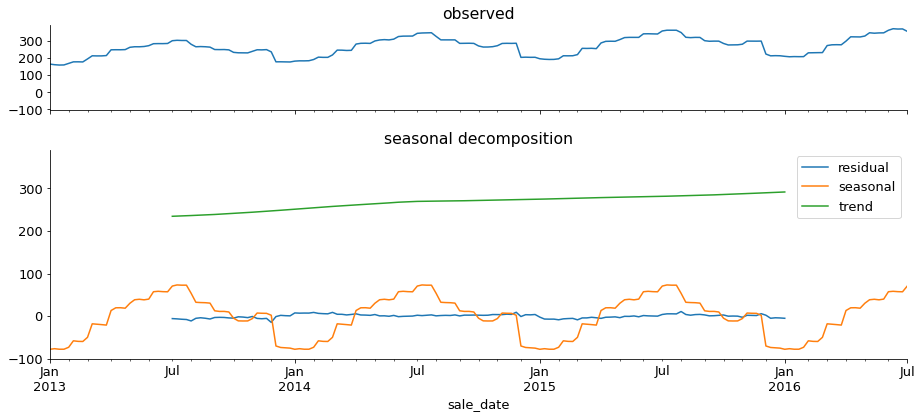

In [82]:
gs = plt.GridSpec(3, 1)
fig = plt.figure()
ax1 = fig.add_subplot(gs[1:])
ax2 = fig.add_subplot(gs[0], sharex=ax1, sharey=ax1)
result.iloc[:, 1:].plot(ax=ax1, title='seasonal decomposition')
result.observed.plot(ax=ax2, title='observed')
fig.tight_layout()

 - y is total sales

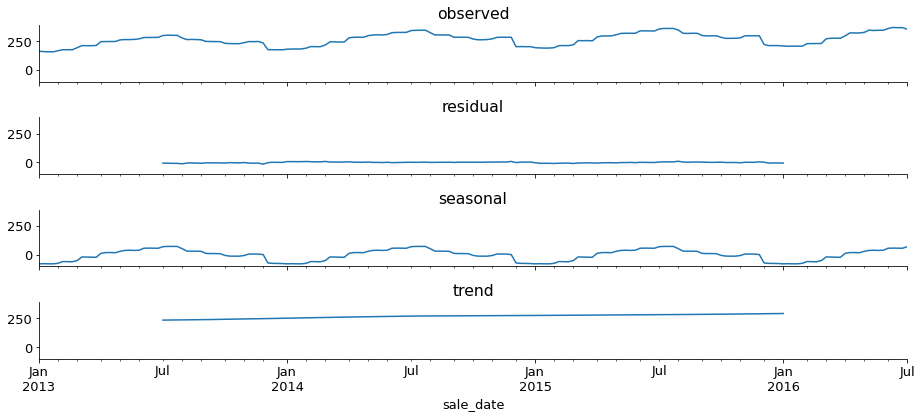

In [83]:
fig, axs = plt.subplots(4, 1, sharex=True, sharey=True)
for ax, (col, x) in zip(axs, result.iteritems()):
    x.plot(ax=ax, title=col)
fig.tight_layout()

## Import German Energy Data

In [138]:
df = get_germany_wind_solar_data()

In [140]:
df = prepare_german_energy_data(df)

In [141]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,21.54,40.042,187.626,January,2006
2006-01-02,1380.521,21.54,40.042,187.626,January,2006
2006-01-03,1442.533,21.54,40.042,187.626,January,2006
2006-01-04,1457.217,21.54,40.042,187.626,January,2006
2006-01-05,1477.131,21.54,40.042,187.626,January,2006


## Data Splitting

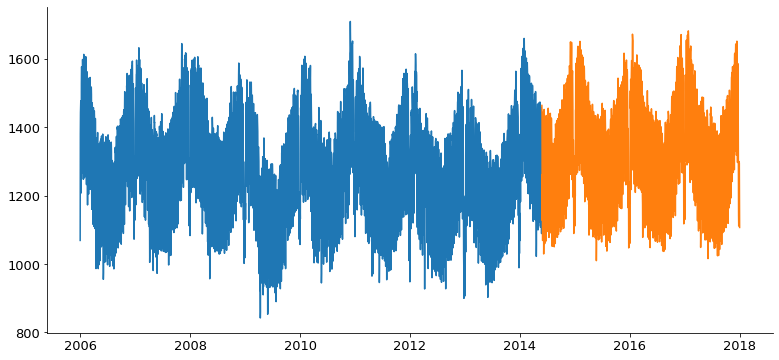

In [142]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)

In [154]:
c = train.Consumption.copy()
w = train.Wind.copy()
s = train.Solar.copy()

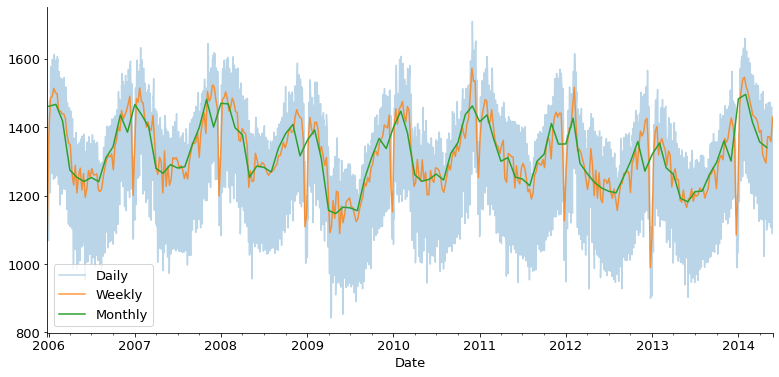

In [153]:
ax = c.plot(alpha=.3, label='Daily')
c.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
c.resample('M').mean().plot(ax=ax, label='Monthly')
ax.legend()

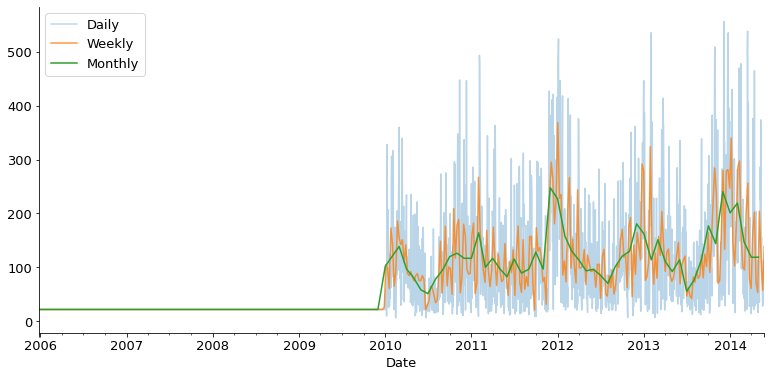

In [155]:
ax = w.plot(alpha=.3, label='Daily')
w.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
w.resample('M').mean().plot(ax=ax, label='Monthly')
ax.legend()

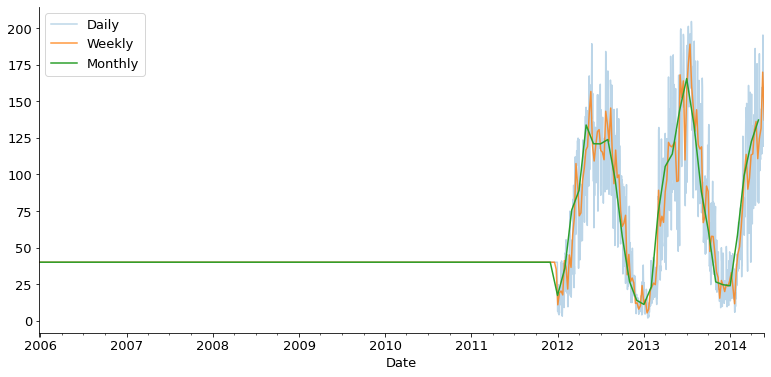

In [156]:
ax = s.plot(alpha=.3, label='Daily')
s.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
s.resample('M').mean().plot(ax=ax, label='Monthly')
ax.legend()

We lack good data about wind and solar power in in the earlier years of our graph.

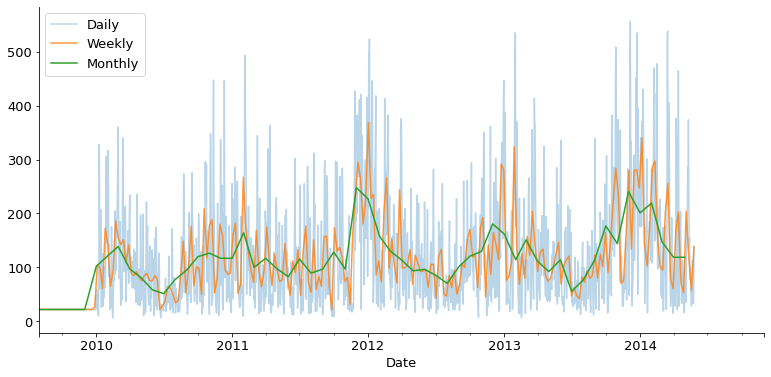

In [166]:
ax = w.plot(alpha=.3, label='Daily')
w.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
w.resample('M').mean().plot(ax=ax, label='Monthly')
ax.set_xlim([datetime.date(2009, 7, 31), datetime.date(2014, 12, 1)])
legend = ax.legend()

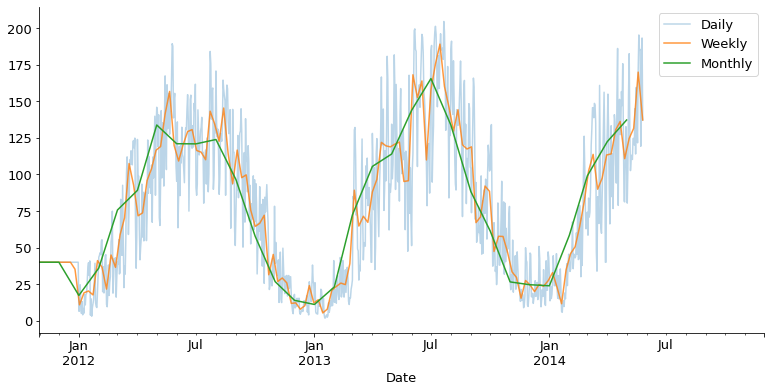

In [167]:
ax = s.plot(alpha=.3, label='Daily')
s.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
s.resample('M').mean().plot(ax=ax, label='Monthly')
ax.set_xlim([datetime.date(2011, 10, 31), datetime.date(2014, 12, 1)])
legend = ax.legend()

### Energy by Weekday

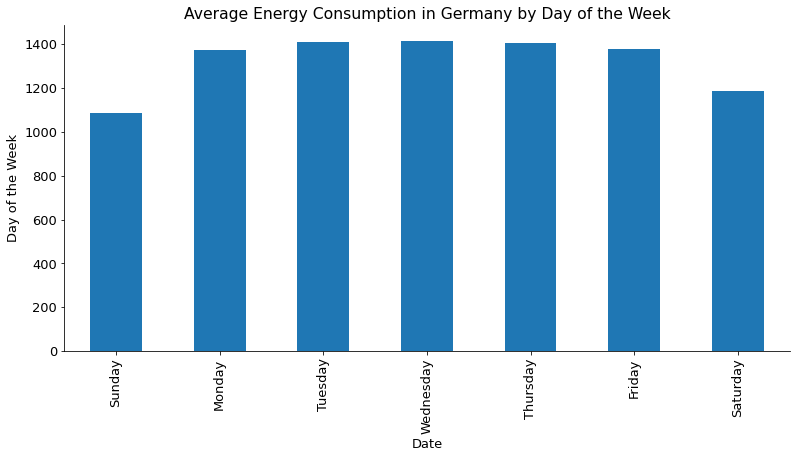

In [187]:
ax = c.groupby(c.index.strftime('%w-%A')).mean().plot.bar()
labels = ax.get_xticklabels()
set_labels = ax.set_xticklabels([l.get_text()[2:] for l in labels])
labels = ax.set(title = "Average Energy Consumption in Germany by Day of the Week",
      ylabel = "Day of the Week")

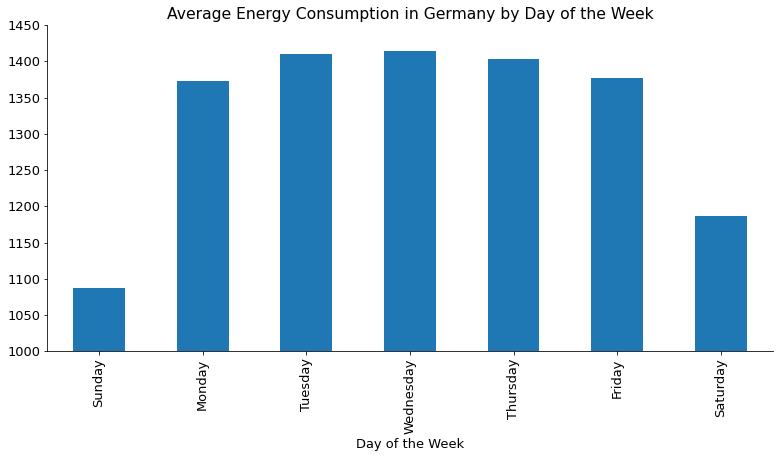

In [188]:
ax = c.groupby(c.index.strftime('%w-%A')).mean().plot.bar()
labels = ax.get_xticklabels()
set_labels = ax.set_xticklabels([l.get_text()[2:] for l in labels])
labels = ax.set(title = "Average Energy Consumption in Germany by Day of the Week",
      xlabel = "Day of the Week")
limits = plt.ylim(1000, 1450)

Weekdays see more energy consumption that weekends.

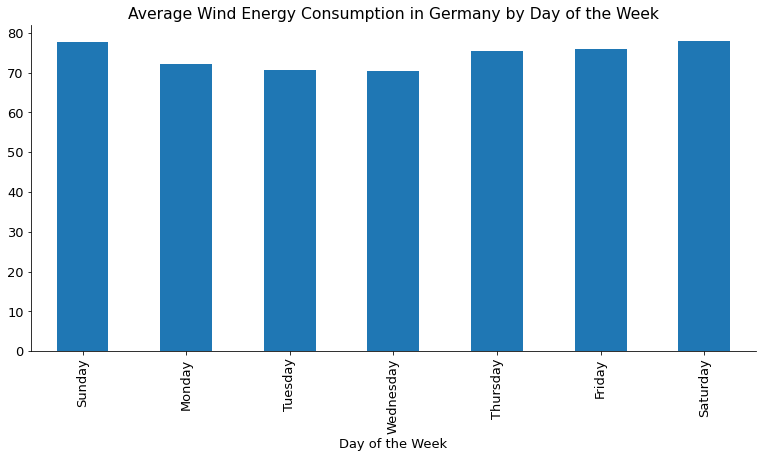

In [185]:
ax = w.groupby(w.index.strftime('%w-%A')).mean().plot.bar()
labels = ax.get_xticklabels()
set_labels = ax.set_xticklabels([l.get_text()[2:] for l in labels])
labels = ax.set(title = "Average Wind Energy Consumption in Germany by Day of the Week",
      xlabel = "Day of the Week")

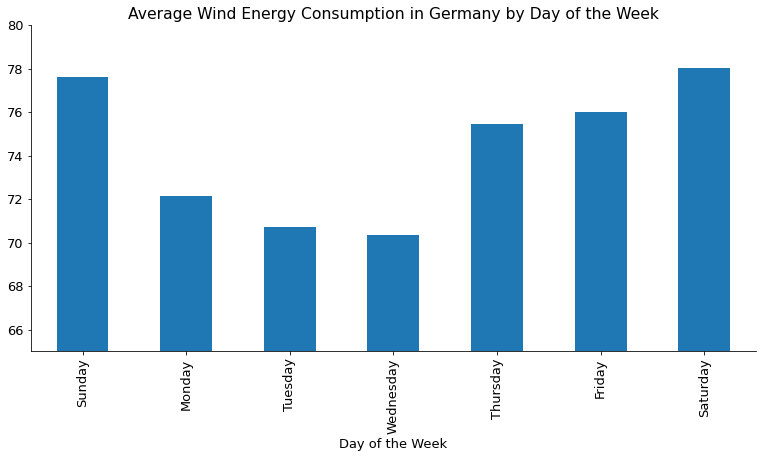

In [186]:
ax = w.groupby(w.index.strftime('%w-%A')).mean().plot.bar()
labels = ax.get_xticklabels()
set_labels = ax.set_xticklabels([l.get_text()[2:] for l in labels])
labels = ax.set(title = "Average Wind Energy Consumption in Germany by Day of the Week",
      xlabel = "Day of the Week")
limits = plt.ylim(65, 80)

More wind energy is used on the weekends.

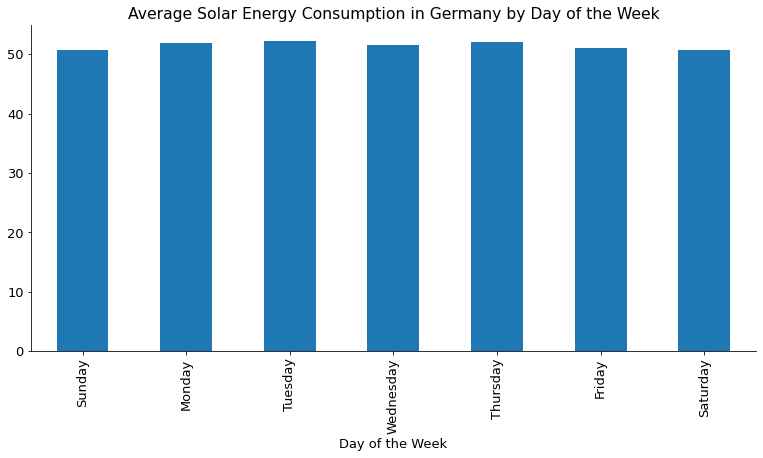

In [189]:
ax = s.groupby(s.index.strftime('%w-%A')).mean().plot.bar()
labels = ax.get_xticklabels()
set_labels = ax.set_xticklabels([l.get_text()[2:] for l in labels])
labels = ax.set(title = "Average Solar Energy Consumption in Germany by Day of the Week",
      xlabel = "Day of the Week")

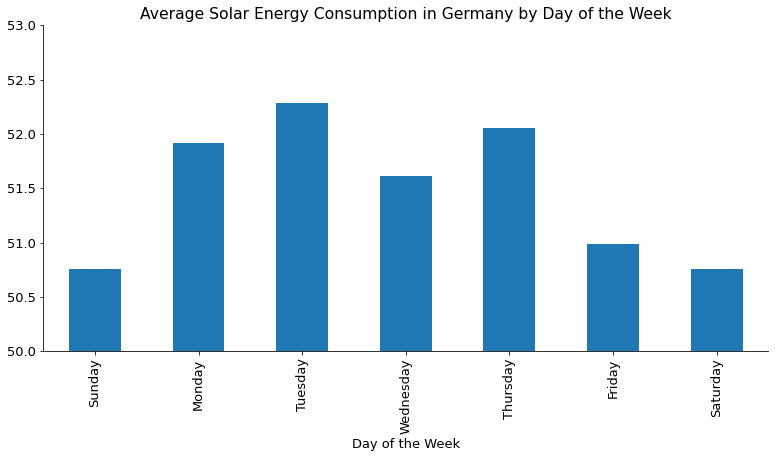

In [192]:
ax = s.groupby(s.index.strftime('%w-%A')).mean().plot.bar()
labels = ax.get_xticklabels()
set_labels = ax.set_xticklabels([l.get_text()[2:] for l in labels])
labels = ax.set(title = "Average Solar Energy Consumption in Germany by Day of the Week",
      xlabel = "Day of the Week")
limits = plt.ylim(50, 53)

Solar energy consumption is slightly higher during the week than during the weekend.

### Energy by Year

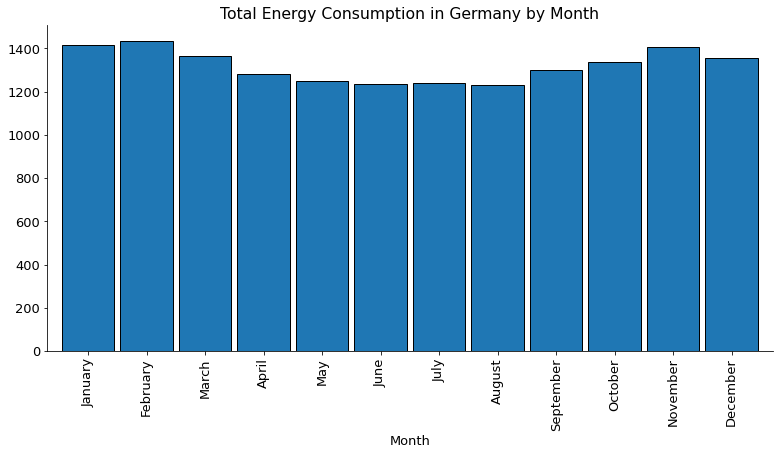

In [199]:
ax = c.groupby(c.index.strftime('%m-%B')).mean().plot.bar(width=.9, ec='black')
labels = ax.get_xticklabels()
set_labels = ax.set_xticklabels([l.get_text()[3:] for l in labels])
labels = ax.set(title = "Total Energy Consumption in Germany by Month", xlabel = "Month")

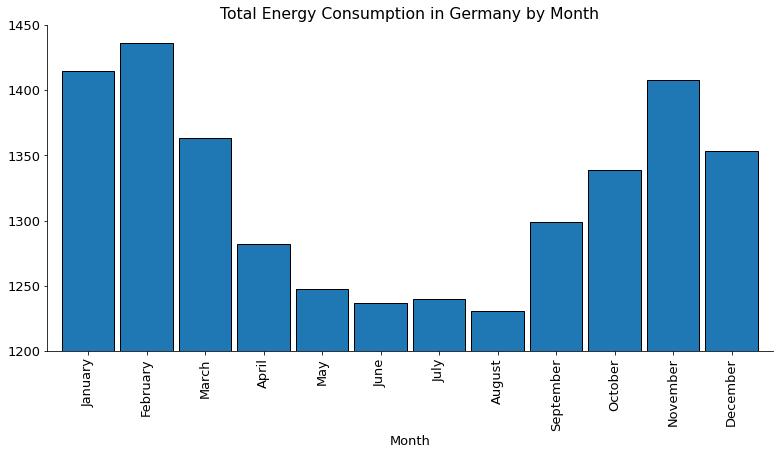

In [200]:
ax = c.groupby(c.index.strftime('%m-%B')).mean().plot.bar(width=.9, ec='black')
labels = ax.get_xticklabels()
set_labels = ax.set_xticklabels([l.get_text()[3:] for l in labels])
limits = plt.ylim(1200, 1450)
labels = ax.set(title = "Total Energy Consumption in Germany by Month", xlabel = "Month")

Energy consumption in Germany is higher in the winter and lower in the summer.

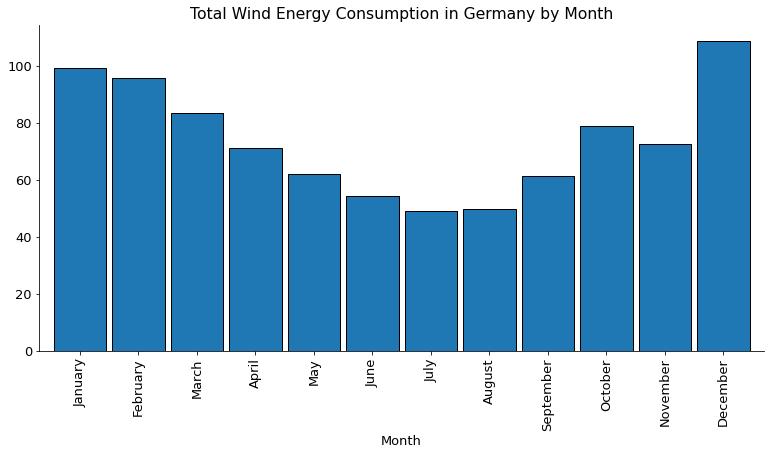

In [201]:
ax = w.groupby(w.index.strftime('%m-%B')).mean().plot.bar(width=.9, ec='black')
labels = ax.get_xticklabels()
set_labels = ax.set_xticklabels([l.get_text()[3:] for l in labels])
labels = ax.set(title = "Total Wind Energy Consumption in Germany by Month", xlabel = "Month")

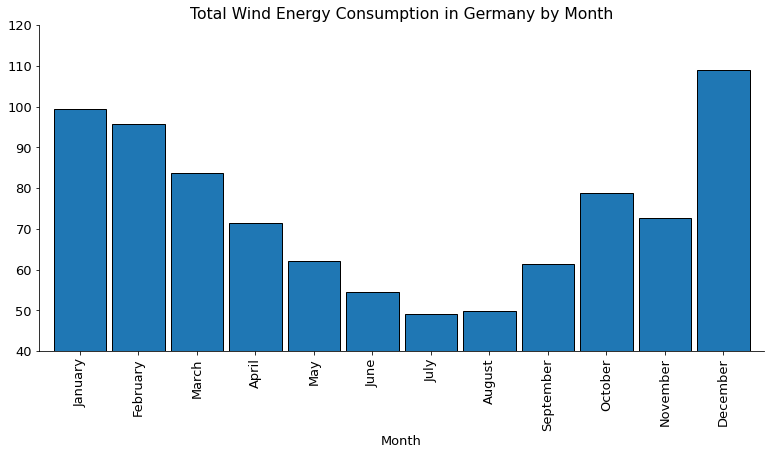

In [203]:
ax = w.groupby(w.index.strftime('%m-%B')).mean().plot.bar(width=.9, ec='black')
labels = ax.get_xticklabels()
set_labels = ax.set_xticklabels([l.get_text()[3:] for l in labels])
labels = ax.set(title = "Total Wind Energy Consumption in Germany by Month", xlabel = "Month")
limits = plt.ylim(40, 120)

Wind energy consumption is higher during the winter and lower during the summer.

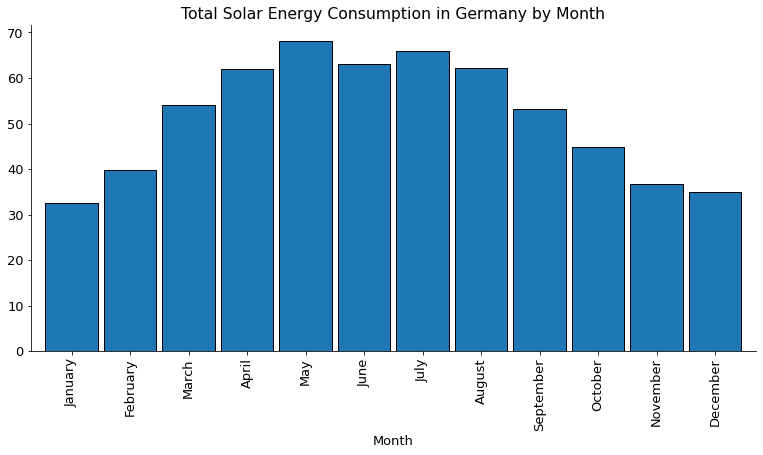

In [204]:
ax = s.groupby(s.index.strftime('%m-%B')).mean().plot.bar(width=.9, ec='black')
labels = ax.get_xticklabels()
set_labels = ax.set_xticklabels([l.get_text()[3:] for l in labels])
labels = ax.set(title = "Total Solar Energy Consumption in Germany by Month", xlabel = "Month")

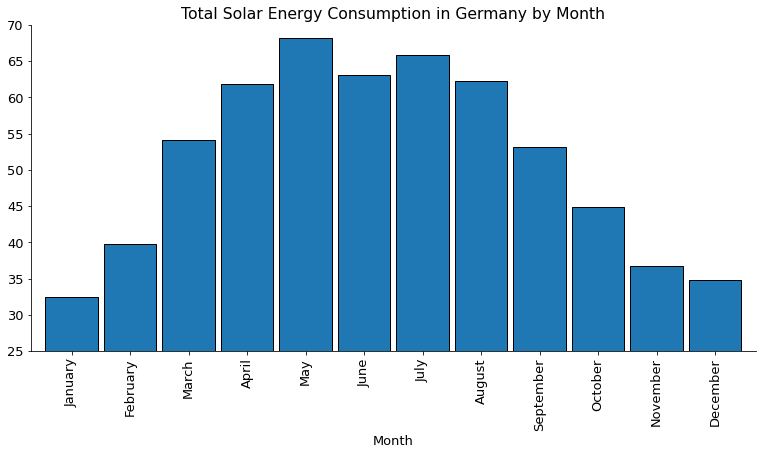

In [205]:
ax = s.groupby(s.index.strftime('%m-%B')).mean().plot.bar(width=.9, ec='black')
labels = ax.get_xticklabels()
set_labels = ax.set_xticklabels([l.get_text()[3:] for l in labels])
labels = ax.set(title = "Total Solar Energy Consumption in Germany by Month", xlabel = "Month")
limits = plt.ylim(25, 70)

Solar energy consumption is higher in the summer than in the winter.

### Monthly Differences

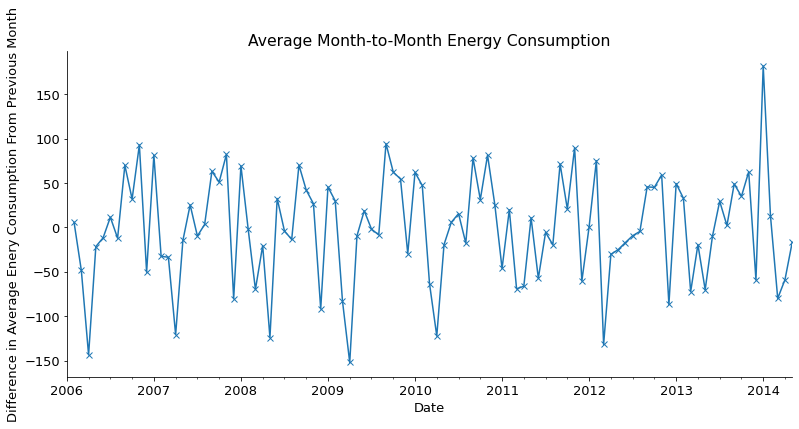

In [206]:
ax = c.resample('M').mean().diff().plot(marker='x')
title = ax.set(title = "Average Month-to-Month Energy Consumption", ylabel = "Difference in Average Enery Consumption From Previous Month")

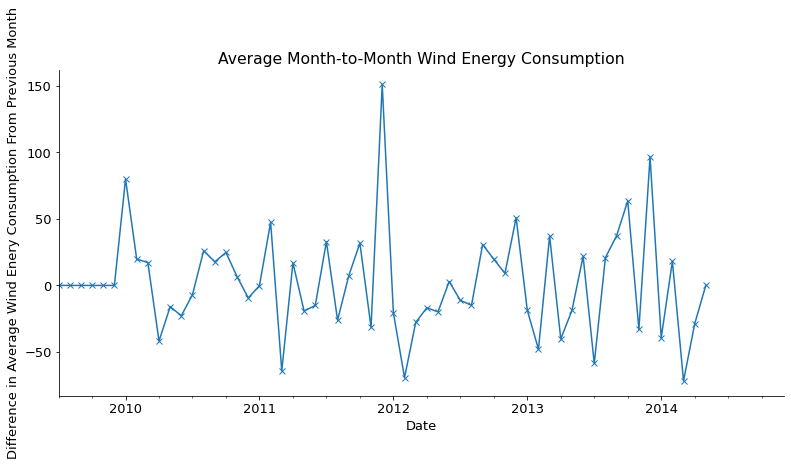

In [209]:
ax = w.resample('M').mean().diff().plot(marker='x')
title = ax.set(title = "Average Month-to-Month Wind Energy Consumption", ylabel = "Difference in Average Wind Enery Consumption From Previous Month")
limits = ax.set_xlim([datetime.date(2009, 7, 31), datetime.date(2014, 12, 1)])


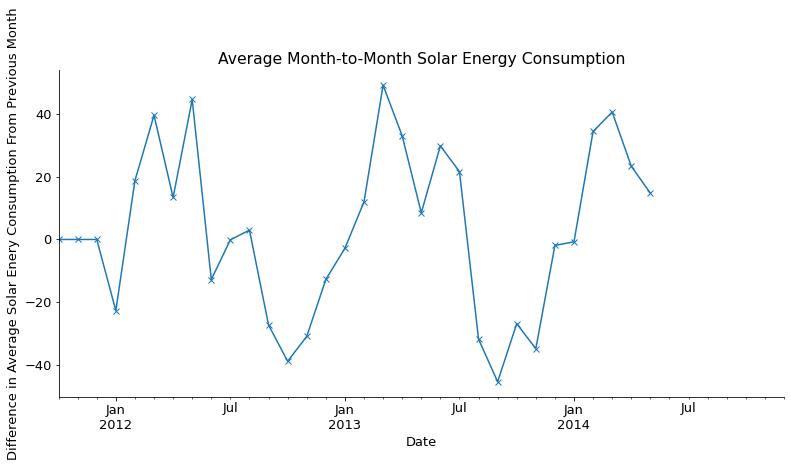

In [210]:
ax = s.resample('M').mean().diff().plot(marker='x')
title = ax.set(title = "Average Month-to-Month Solar Energy Consumption", ylabel = "Difference in Average Solar Enery Consumption From Previous Month")
limits = ax.set_xlim([datetime.date(2011, 10, 31), datetime.date(2014, 12, 1)])

### Shift 

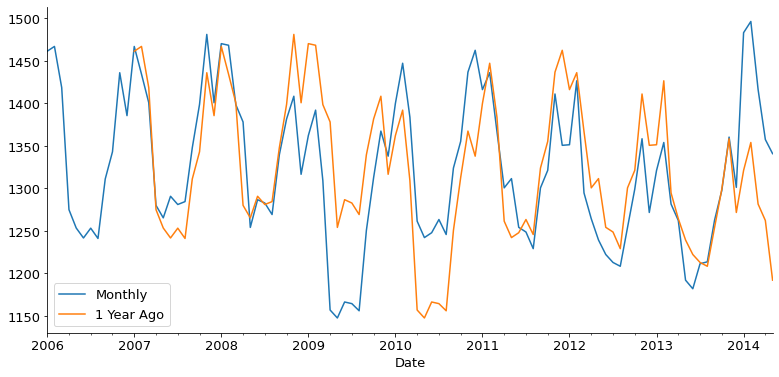

In [212]:
ax = c.resample('M').mean().plot(label='Monthly')
c.resample('M').mean().shift(12).plot(label='1 Year Ago', ax=ax)
ax.legend()

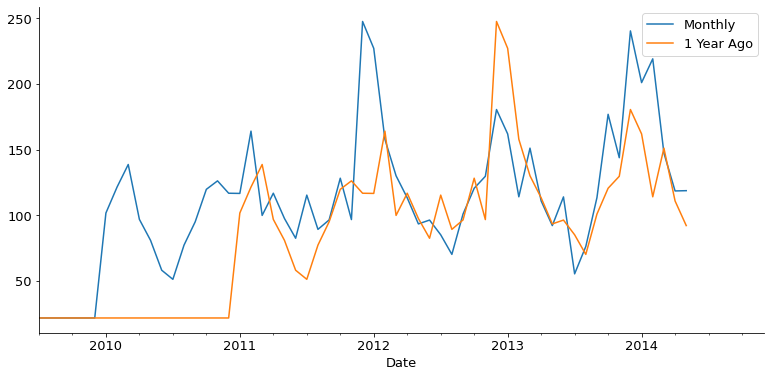

In [214]:
ax = w.resample('M').mean().plot(label='Monthly')
w.resample('M').mean().shift(12).plot(label='1 Year Ago', ax=ax)
ax.legend()
limits = ax.set_xlim([datetime.date(2009, 7, 31), datetime.date(2014, 12, 1)])

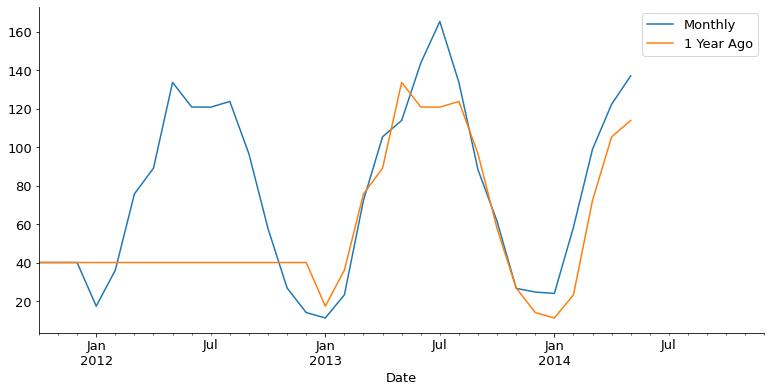

In [215]:
ax = s.resample('M').mean().plot(label='Monthly')
s.resample('M').mean().shift(12).plot(label='1 Year Ago', ax=ax)
ax.legend()
limits = ax.set_xlim([datetime.date(2011, 10, 31), datetime.date(2014, 12, 1)])

### Seasonality

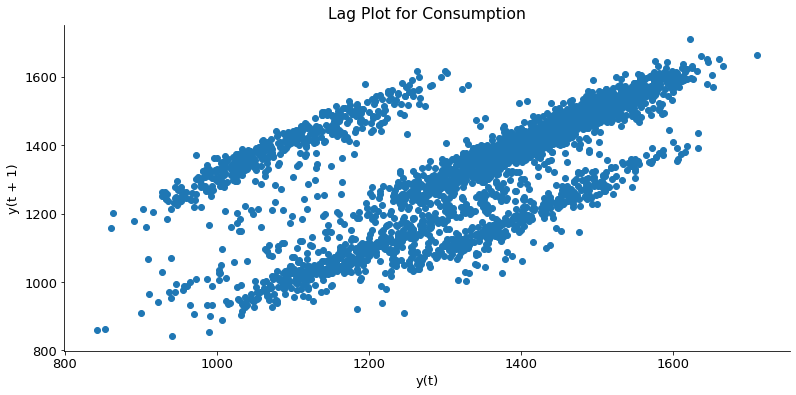

In [218]:
c_lag_plot = pd.plotting.lag_plot(c.resample('D').mean(), 1)
title = c_lag_plot.set(title = "Lag Plot for Consumption")

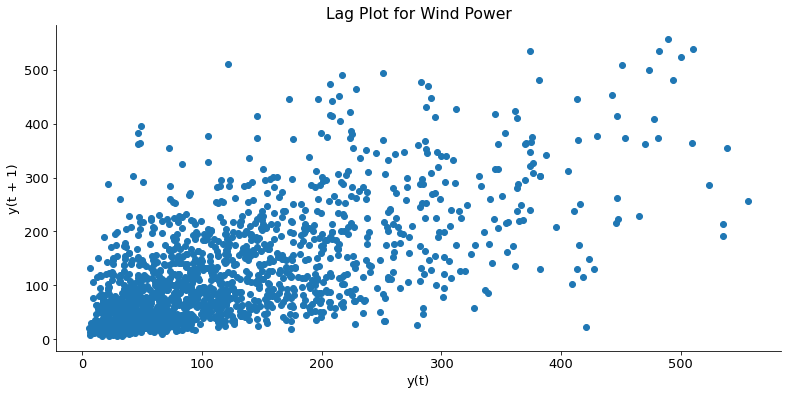

In [219]:
w_lag_plot = pd.plotting.lag_plot(w.resample('D').mean(), 1)
title = w_lag_plot.set(title = "Lag Plot for Wind Power")

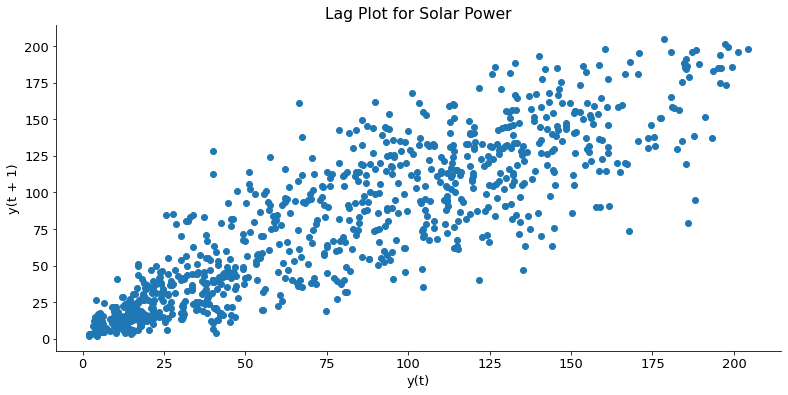

In [220]:
s_lag_plot = pd.plotting.lag_plot(s.resample('D').mean(), 1)
title = s_lag_plot.set(title = "Lag Plot for Solar Power")

In [225]:
autocorr_c = pd.Series({lag: autocorrelation(c.resample('D').mean(), lag) for lag in range(1, 365)})
autocorr_c_week = pd.Series({lag: autocorrelation(c.resample('W').mean(), lag) for lag in range(1, 365)})
autocorr_w = pd.Series({lag: autocorrelation(w.resample('D').mean(), lag) for lag in range(1, 365)})
autocorr_s = pd.Series({lag: autocorrelation(s.resample('D').mean(), lag) for lag in range(1, 365)})

<AxesSubplot:xlabel='lag period', ylabel='autocorrelation, Total Consumption'>

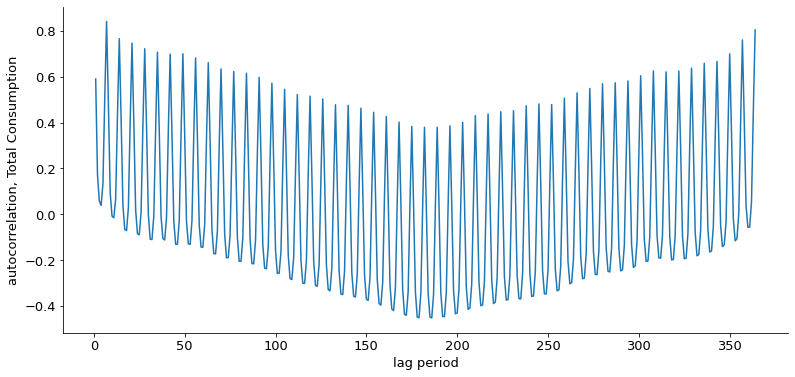

In [222]:
autocorr_c.plot(xlabel='lag period', ylabel='autocorrelation, Total Consumption')


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

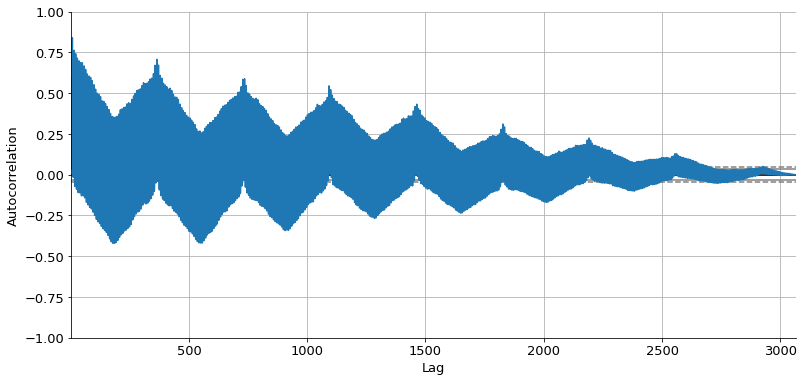

In [227]:
pd.plotting.autocorrelation_plot(c.resample('D').mean())

<AxesSubplot:xlabel='lag period', ylabel='autocorrelation, Total Consumption'>

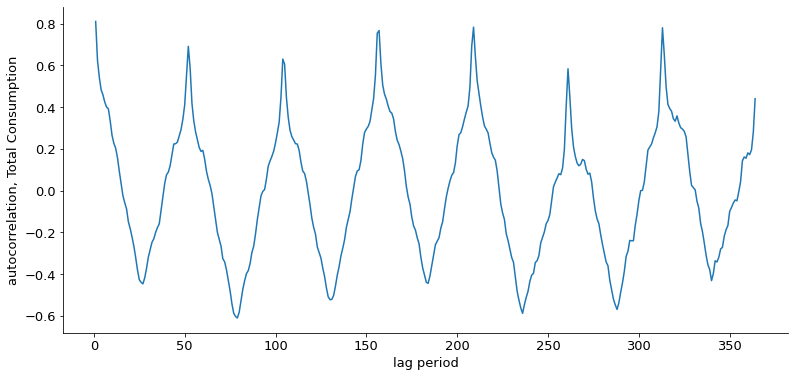

In [226]:
autocorr_c_week.plot(xlabel='lag period', ylabel='autocorrelation, Total Consumption')



<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

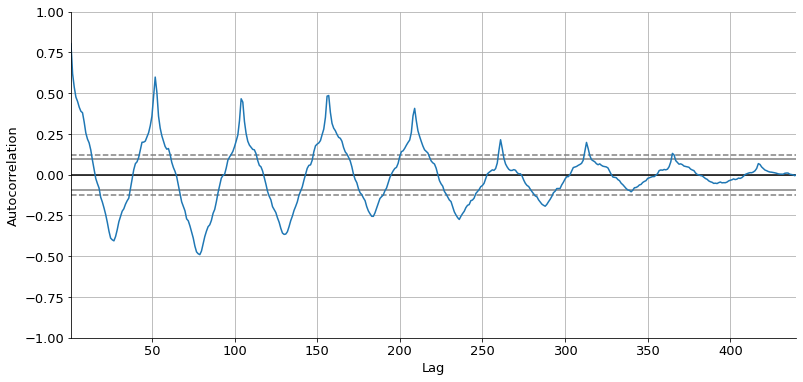

In [228]:
pd.plotting.autocorrelation_plot(c.resample('W').mean())

<AxesSubplot:xlabel='lag period', ylabel='autocorrelation, Wind Power'>

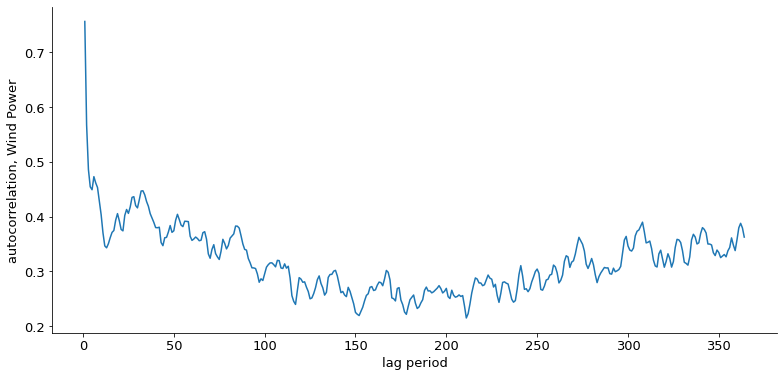

In [223]:
autocorr_w.plot(xlabel='lag period', ylabel='autocorrelation, Wind Power')


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

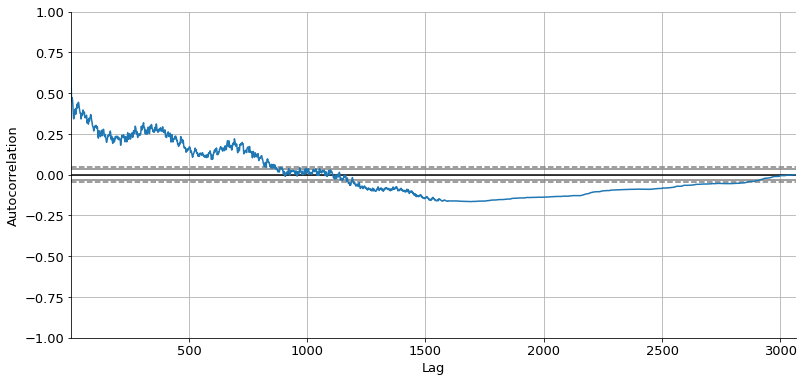

In [229]:
pd.plotting.autocorrelation_plot(w.resample('D').mean())

<AxesSubplot:xlabel='lag period', ylabel='autocorrelation, Solar Power'>

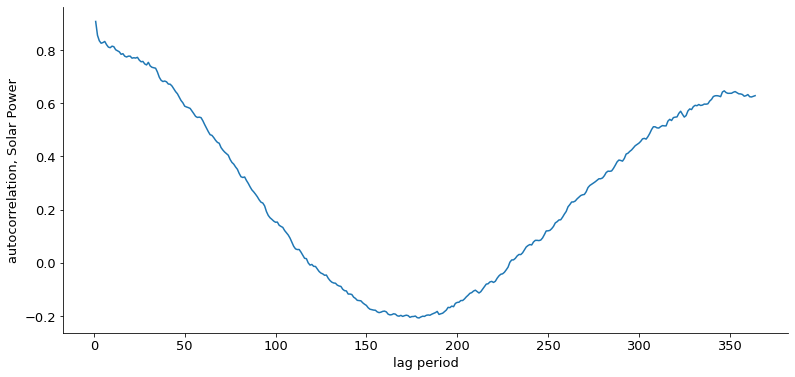

In [224]:
autocorr_s.plot(xlabel='lag period', ylabel='autocorrelation, Solar Power')


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

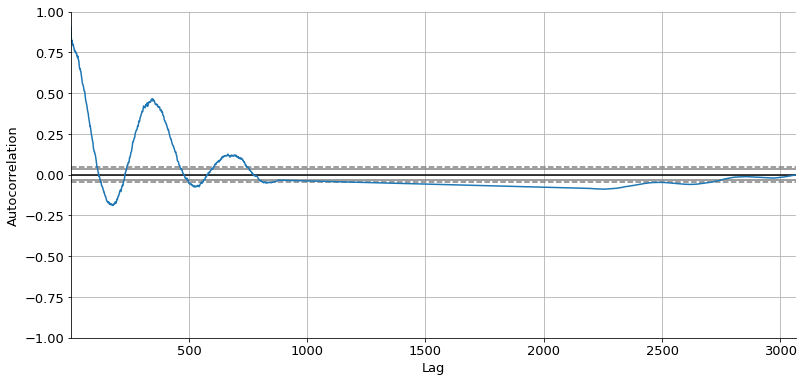

In [230]:
pd.plotting.autocorrelation_plot(s.resample('D').mean())

### Seasonal Plot

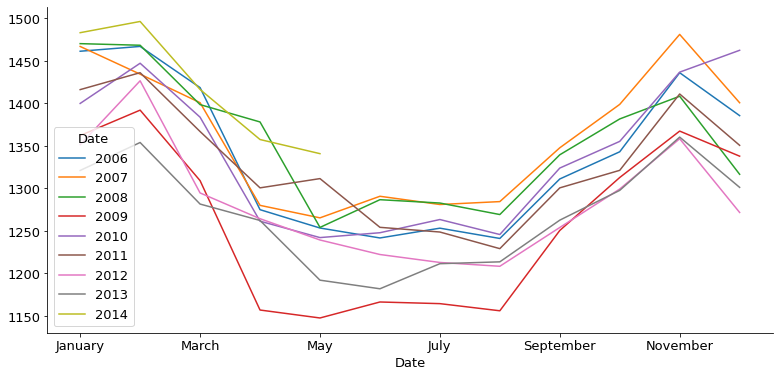

In [235]:
ax = c.groupby([c.index.year, c.index.strftime('%m-%B')]).mean().unstack(0).plot()
labels = ax.get_xticklabels()
labels = ax.set_xticklabels([l.get_text()[3:] for l in labels])

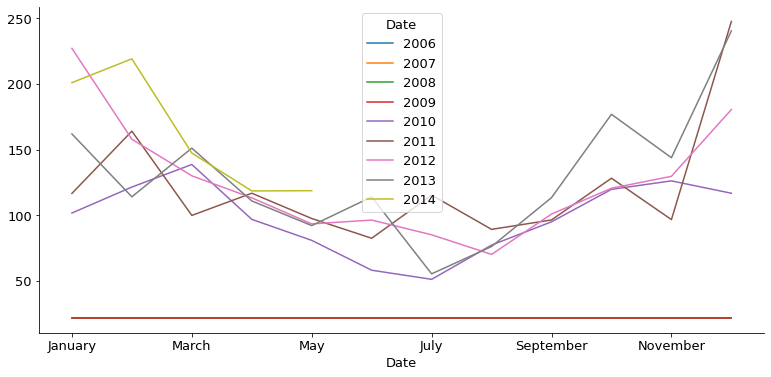

In [236]:
ax = w.groupby([w.index.year, w.index.strftime('%m-%B')]).mean().unstack(0).plot()
labels = ax.get_xticklabels()
labels = ax.set_xticklabels([l.get_text()[3:] for l in labels])

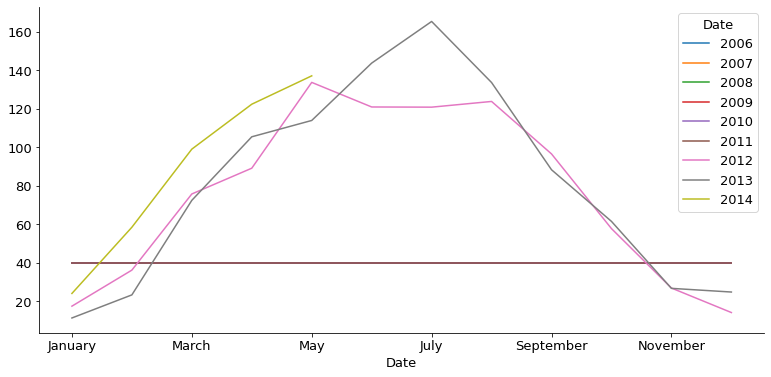

In [237]:
ax = s.groupby([s.index.year, s.index.strftime('%m-%B')]).mean().unstack(0).plot()
labels = ax.get_xticklabels()
labels = ax.set_xticklabels([l.get_text()[3:] for l in labels])

### Seasonal Decomposition

In [251]:
c = c.resample('W').mean()
w = w.resample('W').mean()
s = s.resample('W').mean()

In [253]:
result_c = sm.tsa.seasonal_decompose(c, model='additive')
result_c = pd.DataFrame(dict(
    observed=result_c.observed,
    residual=result_c.resid,
    seasonal=result_c.seasonal,
    trend=result_c.trend
))

result_w = sm.tsa.seasonal_decompose(w, model='additive')
result_w = pd.DataFrame(dict(
    observed=result_w.observed,
    residual=result_w.resid,
    seasonal=result_w.seasonal,
    trend=result_w.trend
))

result_s = sm.tsa.seasonal_decompose(s, model='additive')
result_s = pd.DataFrame(dict(
    observed=result_s.observed,
    residual=result_s.resid,
    seasonal=result_s.seasonal,
    trend=result_s.trend
))

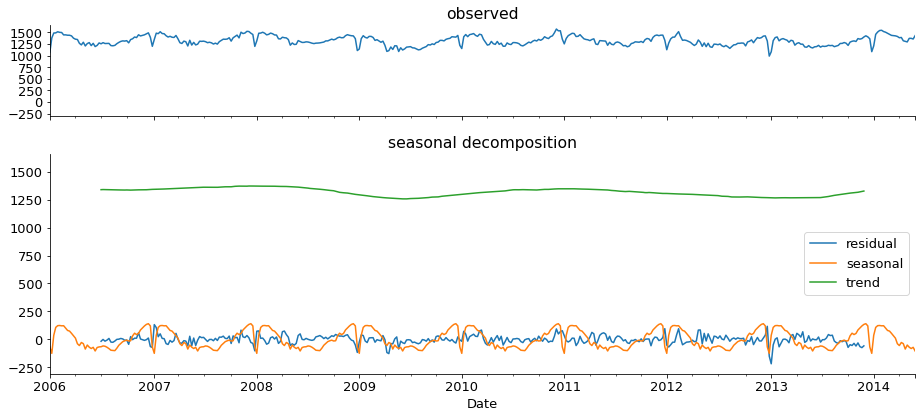

In [255]:
gs = plt.GridSpec(3, 1)
fig = plt.figure()
ax1 = fig.add_subplot(gs[1:])
ax2 = fig.add_subplot(gs[0], sharex=ax1, sharey=ax1)
result_c.iloc[:, 1:].plot(ax=ax1, title='seasonal decomposition')
result_c.observed.plot(ax=ax2, title='observed')
fig.tight_layout()

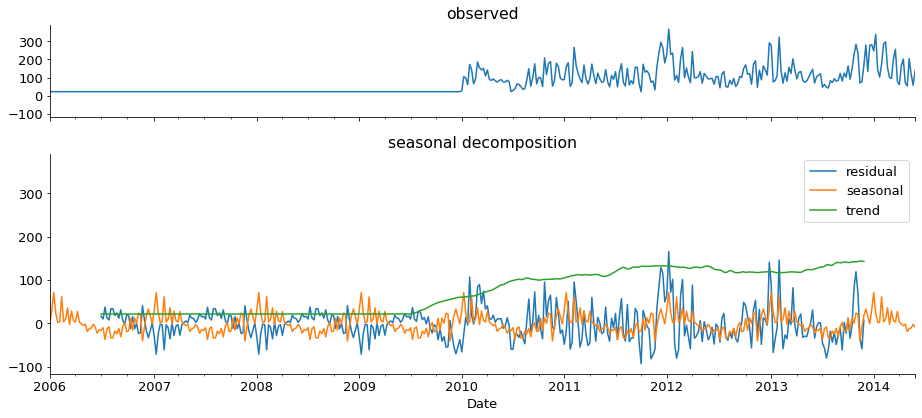

In [256]:
gs = plt.GridSpec(3, 1)
fig = plt.figure()
ax1 = fig.add_subplot(gs[1:])
ax2 = fig.add_subplot(gs[0], sharex=ax1, sharey=ax1)
result_w.iloc[:, 1:].plot(ax=ax1, title='seasonal decomposition')
result_w.observed.plot(ax=ax2, title='observed')
fig.tight_layout()

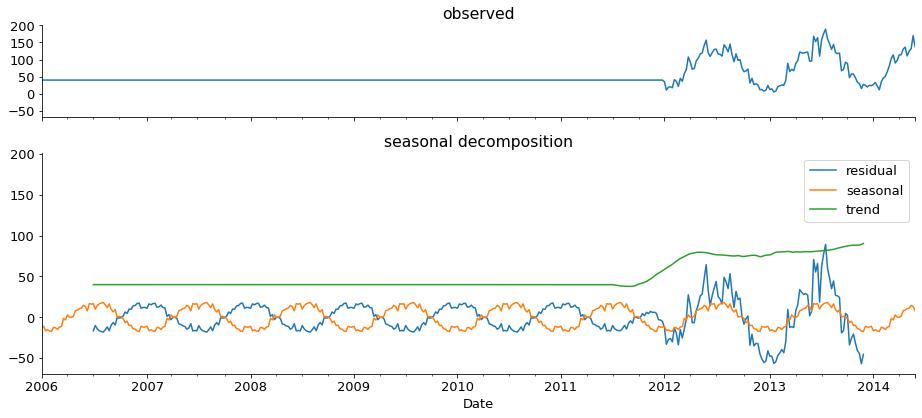

In [257]:
gs = plt.GridSpec(3, 1)
fig = plt.figure()
ax1 = fig.add_subplot(gs[1:])
ax2 = fig.add_subplot(gs[0], sharex=ax1, sharey=ax1)
result_s.iloc[:, 1:].plot(ax=ax1, title='seasonal decomposition')
result_s.observed.plot(ax=ax2, title='observed')
fig.tight_layout()